# **Trabalho Final**
### Algoritmos e Programação com Linguagem Python
---

**Orientações Gerais:**

* Esta é o trabalho final prático onde serão trabalhados conceitos
apresentados e exercitados em sala de aula.

* Aspéctos como clareza e organização do código, comentários, raciocínio lógico, coerência no nome de variáveis, utilização das estruturas mais adequadas para a solução dos problemas e o funcionamento adequado serão analisados e irão compor o valor da nota final.

* Procure entender exatamente o que se pede antes de iniciar a codificação. Quando se sabe o que é necessário fazer, a codificação fica mais fácil, mais eficiente e mais divertida ;-).

* Faça o upload do notebook completo nomeado da seguinte forma: *nome_sobrenome_RA.ipynb*.

* No caso de grupos, informar ao professor os membros de cada grupo e cada um deverá importar o arquivo no Canvas individualmente.

* Arquivos com nomes incorretos serão desconsiderados!

* Não deixem dúvidas para trás! Acessem os grupos combinados ou entrem em contato com o professor.

✌ Sucesso o/






# RMS Titanic

O RMS Titanic foi um navio de passageiros britânico operado pela White Star Line e construído pelos estaleiros da Harland and Wolff em Belfast. Foi a segunda embarcação da Classe Olympic de transatlânticos depois do RMS Olympic e seguido pelo HMHS Britannic. Projetado pelos engenheiros navais Alexander Carlisle e Thomas Andrews, sua construção começou em março de 1909 e ele foi lançado ao mar em maio de 1911. O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável".

A embarcação partiu em sua viagem inaugural de Southampton para Nova Iorque em 10 de abril de 1912, no caminho passando em Cherbourg-Octeville na França e por Queenstown na Irlanda. Ele colidiu com um iceberg às 23h40min do dia 14 de abril e afundou na madrugada do dia seguinte matando mais de 1500 pessoas, sendo um dos maiores desastres marítimos em tempos de paz de toda a história. Seu naufrágio destacou vários pontos fracos de seu projeto, deficiências nos procedimentos de evacuação de emergência e falhas nas regulamentações marítimas da época. Comissões de inquérito foram instauradas nos Estados Unidos e no Reino Unido, levando a mudanças nas leis internacionais de navegação que permanecem em vigor mais de um século depois.

Os destroços do Titanic foram procurados por décadas até serem encontrados em 1985 por uma equipe liderada por Robert Ballard. Ele se encontra a 3843 m de profundidade e a 650 km ao sudeste de Terra Nova no Canadá. Sua história e naufrágio permaneceram no imaginário popular durante décadas, levando a produção de vários livros e filmes a seu respeito, mais notavelmente o filme Titanic de 1997. Até hoje o Titanic permanece como um dos navios mais famosos da história, com seus destroços atraindo várias expedições de exploração ao longo dos anos.

*Fonte:* [WikiPedia](https://pt.wikipedia.org/wiki/RMS_Titanic)

--------

A equipe da [Udacity](https://udacity.com) disponibilizou informações sobre uma parte dos passageiros à bordo do RMS Titanic no dia daquela tragédia. Esse _dataset_ que contém informações reais vem sendo utilizado em diversos estudos de caso, além de servir de base para aprendizado de Ciência de Dados, Estatística e Machine Learning.

O arquivo **titanic_data.csv** contém informações reais sobre os passageiros organizadas da seguinte forma:

- Survived (Sobreviveu): 0 = Não, 1 = Sim
- Pclass (Classe): Classe de ingresso 1 = 1º, 2 = 2º, 3 = 3º
- Sex (Sexo): Sexo do passageiro
- Age (Idade): Idade em anos
- Sibsp: Quantidade de irmãos / cônjuges a bordo do Titanic
- Parch: Quantidade de pais / crianças a bordo do Titanic
- Ticket (Bilhete): Número do bilhete de embarque
- Fare (Tarifa): Tarifa paga pelo Passageiro
- Cabin (Cabine): Número de cabine
- Embarked (Embarque): Porto de Embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

O objetivo deste estudo é obter algumas informações estatísticas sobre a tragédia e realizar alguns _insights_ a respeito dos tripulantes e das circunstâncias do acidente.

Efetue a carga do arquivo através da biblioteca _Pandas_ e a partir do _DataFrame_ gerado, efetue as operações necessárias para responder as questões.


## Importando o DataSet

1 - Efetuar a leitura do dataset através do Pandas, gerando um DataFrame de nome tit, levando-se em consideração que o arquivo encontra-se na mesma pasta do notebook.

In [28]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data manipulation
import pandas as pd
import numpy as np

# system
import gc

In [29]:
# utils
TEXT_COLOR = "#F4FAFF"
PLOT_COLOR = "#236589"
FIG_COLOR = "#383838"

# messages
def _insights(message: str, length: int = 30) -> None:

    # splitting message
    message = message.split(sep=" ")
    message.insert(0, "\033[33;1mInsight\033[0m:")

    # adding break lines
    _add_break_line = lambda word_index: message[word_index] if (word_index + 1) % length else message[word_index] + "\n"
    message = list(map(_add_break_line, range(len(message))))

    print(" ".join(message))

# plots
def count_plot(data: pd.DataFrame, column: str, title: str, _x: float, _y: float, subtitle: str = None):

    # preparing figure
    fig, ax = plt.subplots(figsize=(8,5), facecolor=FIG_COLOR)
    ax.set_facecolor(color=FIG_COLOR)

    ax.tick_params(axis="both", colors=TEXT_COLOR, color=TEXT_COLOR)

    ax.spines[["bottom", "left"]].set_color(TEXT_COLOR)
    ax.spines[["top", "right"]].set_visible(False)

    ax.xaxis.label.set_color(color=TEXT_COLOR)
    ax.yaxis.label.set_color(color=TEXT_COLOR)

    # main plot
    sns.countplot(data=data, x=column, color=PLOT_COLOR, width=0.2, ax=ax)
    ax.set_title(
        label=title,
        fontdict={
            "color": TEXT_COLOR,
            "size": 12,
            "weight": "bold"
        }
    )
    ax.set_ylabel("Quantidade")

    # legends
    higher_y = 0
    for bars in ax.patches:
        if bars.get_height() > higher_y:
            higher_y = bars.get_height()
        ax.text(
            x=bars.get_x() + _x,
            y=bars.get_height() - _y,
            s=str(int(bars.get_height())),
            fontdict={
                "color": TEXT_COLOR,
                "size": 10,
                "weight": "bold"
            }
        )

    # subtitle
    if subtitle:
        ax.text(
            x=0.05,
            y=higher_y + 5,
            s=subtitle,
            fontdict={
                "color": TEXT_COLOR,
                "size": 8,
                "style": "italic"
            }
        )

    # displaying figure
    plt.show()
    plt.close(fig=fig)

def plot_hist(data: pd.DataFrame, column: str, title: str, xlabel: str = None, bin: int = "auto", enable_mean: bool = True, enable_median: bool = True):

    # preparing figure
    fig, ax = plt.subplots(figsize=(8,5), facecolor=FIG_COLOR)
    ax.set_facecolor(color=FIG_COLOR)

    ax.tick_params(axis="both", colors=TEXT_COLOR, color=TEXT_COLOR)

    ax.spines[["bottom", "left"]].set_color(TEXT_COLOR)
    ax.spines[["top", "right"]].set_visible(False)

    ax.xaxis.label.set_color(color=TEXT_COLOR)
    ax.yaxis.label.set_color(color=TEXT_COLOR)

    # main plot
    sns.histplot(data=data, x=column, color=PLOT_COLOR, bins=bin, ax=ax)

    ax.set_title(
        label=title,
        fontdict={
            "color": TEXT_COLOR,
            "size": 12,
            "weight": "bold"
        }
    )
    if xlabel:
        ax.set_xlabel(xlabel=xlabel)
    ax.set_ylabel(ylabel="Quantidade")


    # mean and median lines
    _y = 0
    for bars in ax.patches:
        if bars.get_height() > _y:
            _y = bars.get_height()
    _y *= 0.95

    if enable_mean:
        age_mean = data[column].mean()
        ax.plot([age_mean, age_mean], [0, _y * 0.3], linewidth=2, color="lime")
        ax.text(x=60, y=_y, s="Média:", fontdict={"color": "lime", "size": 10, "weight": "bold"})
        ax.text(x=72, y=_y, s=f"{age_mean:.1f}", fontdict={"color": TEXT_COLOR, "size": 10, "weight": "bold"})

    if enable_median:
        age_median = data[column].median()
        ax.plot([age_median, age_median], [0, _y * 0.3], linewidth=2, color="orange")
        ax.text(x=60, y=_y-5, s="Mediana:", fontdict={"color": "orange", "size": 10, "weight": "bold"})
        ax.text(x=72, y=_y-5, s=f"{age_median:.1f}", fontdict={"color": TEXT_COLOR, "size": 10, "weight": "bold"})

    # displaying figure
    plt.show()
    plt.close(fig=fig)

In [30]:
# loading CSV file
tit = pd.read_csv(filepath_or_buffer="/content/titanic_data.csv")

## Conhecendo o DataSet

2 - Quantas linhas e colunas tem o dataset? Quais os tipos das colunas?

In [31]:
# verifying Dataset shape
print(f"Shape: {tit.shape}")

Shape: (891, 12)


In [32]:
# verifying all column dtypes
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


3 - Mostre os dados dos dez primeiros e 8 últimos registros do dataset.

In [33]:
# visualizing the first eight
# samples
tit.head(n=8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [34]:
tit.tail(n=8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.500,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


4 - Cálculos envolvendo colunas numéricas com dados faltantes podem sofrer impacto. É possível afirmar se há dados faltantes no dataset? Caso positivo, quais e quantos seriam esses dados? Preencha os dados faltantes de forma que não influenciem em operações futuras.

In [35]:
# verifying NaN values
tit.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
_insights(message="""`Age`, `Cabin` e `Embarked` mostram valores NaN, `Embarked` possui pouquissimos valores faltando, \
preencher com a moda talvez sirva, a coluna `Cabin` está quase toda vázia, mas o número da cabine \
que o passageiro(a) esteve não parece ser um dado muito relevante para gastar tanto tempo pensando \
em como lidar com os NaN dele, `Age` por outro lado possui uma quantidade razoável de NaN e acredito \
que seja um dado relevante pra ser considerado e tratado.""", length=20)

Insight: `Age`, `Cabin` e `Embarked` mostram valores NaN, `Embarked` possui pouquissimos valores faltando, preencher com a moda talvez sirva, a
 coluna `Cabin` está quase toda vázia, mas o número da cabine que o passageiro(a) esteve não parece ser um dado
 muito relevante para gastar tanto tempo pensando em como lidar com os NaN dele, `Age` por outro lado possui uma
 quantidade razoável de NaN e acredito que seja um dado relevante pra ser considerado e tratado.


In [37]:
tit.Embarked.fillna(value=tit.Embarked.mode(), inplace=True)

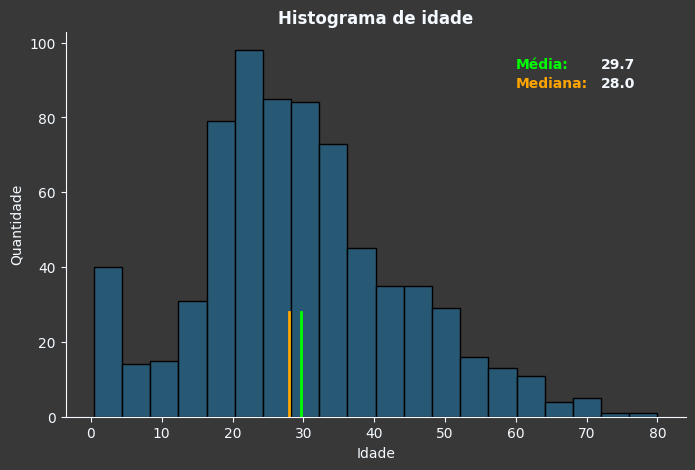

Insight: A média e mediana são valores muito próximos, preencher com qualquer um dos valores
 talvez não influêncie muito nos resultados finais. Vou utilizar então a mediana já que idade
 não possui valor quebrado.


In [38]:
# checking age histogram
plot_hist(
    data=tit,
    column="Age",
    title="Histograma de idade",
    xlabel="Idade"
)
_insights(message="""A média e mediana são valores muito próximos, preencher com qualquer um dos valores \
talvez não influêncie muito nos resultados finais. Vou utilizar então a mediana já que idade não possui valor \
quebrado.""", length=15)

In [39]:
# filling `Age` column with median
tit_age_filled_with_median = tit.copy(deep=True)
tit_age_filled_with_median.Age.fillna(value=tit.median(numeric_only=True), inplace=True)

## Adequando o DataSet

5 - Uma vez que algumas colunas não serão utilizadas, eventualmente é melhor excluí-las para que não interfiram na análise. Assim, exclua do dataset as colunas Sibsp, Parch e Ticket.

In [40]:
# removing unnecessary columns
tit_without_unsued_columns = tit_age_filled_with_median.drop(labels=["SibSp", "Parch", "Ticket"], axis=1, inplace=False)

6 - Renomear as colunas restantes para a lingua portuguesa, utilizando os seguintes nomes de colunas: IdPassageiro, Sobreviveu, Classe, Nome, Sexo, Idade, Tarifa, Cabine e Embarque.

In [41]:
# renaming columns
_column_names = {
    "PassengerId": "IdPassageiro",
    "Survived": "Sobreviveu",
    "Pclass": "Classe",
    "Name": "Nome",
    "Sex": "Sexo",
    "Age": "Idade",
    "Fare": "Tarifa",
    "Cabin": "Cabine",
    "Embarked": "Embarque"
}

tit_with_column_renamed = tit_without_unsued_columns.copy(deep=True)
tit_with_column_renamed.rename(columns=_column_names, inplace=True)

7 - Alterar o conteudo da coluna Sobreviveu para:
- 0 => Não
- 1 => Sim

In [42]:
# converting data of `Sobreviveu`
# column
_survived_mapper = {
    0: "Não",
    1: "Sim"
}

tit_with_survived_in_pt = tit_with_column_renamed.copy(deep=True)
tit_with_survived_in_pt.Sobreviveu = tit_with_survived_in_pt.Sobreviveu.map(_survived_mapper)

8 - Alterar o conteudo da coluna Sexo para:
- female => Mulher
- male   => Homem

In [43]:
# converting data of `Sexo`
# column
_sex_mapper = {
    "female": "Mulher",
    "male": "Homem"
}

tit_with_sex_in_pt = tit_with_survived_in_pt.copy(deep=True)
tit_with_sex_in_pt.Sexo = tit_with_sex_in_pt.Sexo.map(_sex_mapper)

## Alguns números

9 - Quantas mulheres e quantos homems estavam à bordo, de acordo com o dataset?

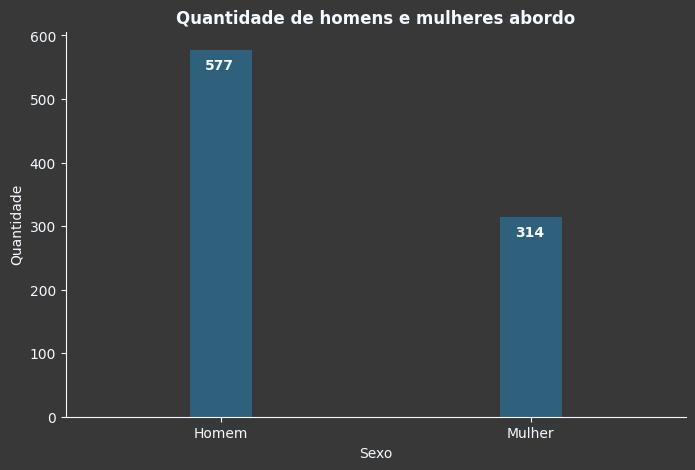

In [44]:
# verifying number of `male` and `female`
count_plot(
    data=tit_with_sex_in_pt,
    column="Sexo",
    title="Quantidade de homens e mulheres abordo",
    _x=0.05,
    _y=30
)

10 - Quantos passageiros sobreviveram e quantos não sobreviveram?

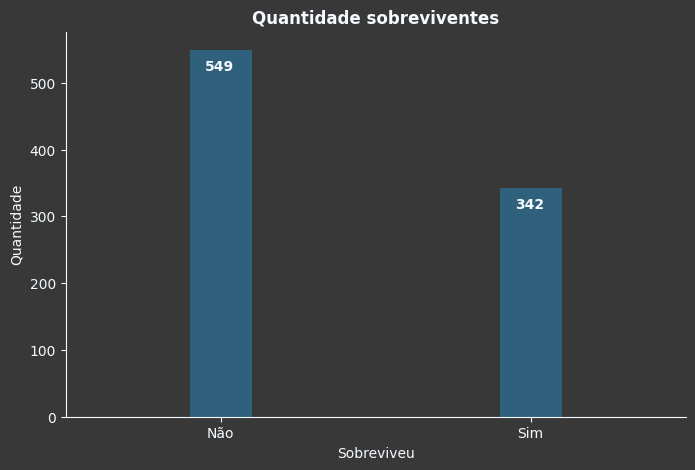

In [45]:
# verifying distribution of
# survivals
count_plot(
    data=tit_with_sex_in_pt,
    column="Sobreviveu",
    title="Quantidade sobreviventes",
    _x=0.05,
    _y=30
)

11 - Quantas mulheres não sobreviveram?

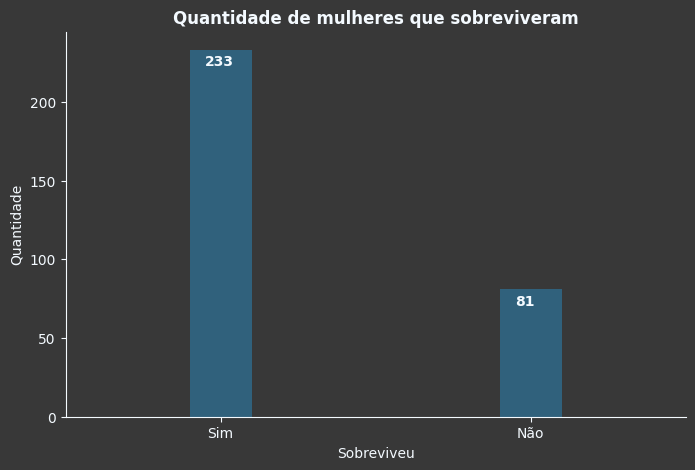

In [46]:
# verifying number of women
# that survived
count_plot(
    data=tit_with_sex_in_pt[tit_with_sex_in_pt.Sexo == "Mulher"],
    column="Sobreviveu",
    title="Quantidade de mulheres que sobreviveram",
    _x=0.05,
    _y=10
)

12 - Proporcionalmente, sobreviveram mais homens ou mais mulheres? Cite as proporções.

In [47]:
_insights(message="É possível notar que boa parte das mulheres abordo (ou as que constam no dataset) sobreviveram ao acidente. \
Com base nos gráficos acima, percebe-se que as mulheres foram prioridade no salvemento, entre todas as mulheres abordo, 233 ficaram \
vivas, representando 74% da população feminina, enquanto os homens, com 316 vivos de 577, apenas 54% da população ficou viva.", length=18)

Insight: É possível notar que boa parte das mulheres abordo (ou as que constam no dataset) sobreviveram ao
 acidente. Com base nos gráficos acima, percebe-se que as mulheres foram prioridade no salvemento, entre todas as mulheres
 abordo, 233 ficaram vivas, representando 74% da população feminina, enquanto os homens, com 316 vivos de 577, apenas
 54% da população ficou viva.


13 - Levando-se em consideração a idade dos passageiros, qual a idade e quantidade de pessoas com o maior número de mortos?

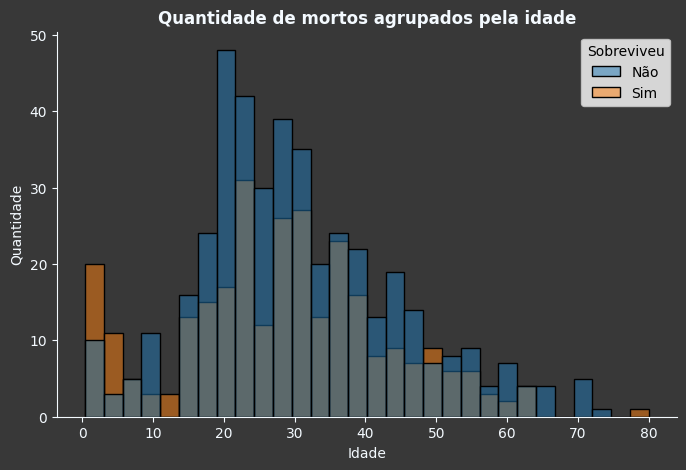

Insight: A quantidade de pessoas mudam dependendo do agrupamento feito pela idade, mas de modo geral, pessoas com
 idade entre seus 20 a 30 anos foram as que mais morreram no acidente. E, conforme aumentamos a
 quantidade de agrupamentos pela idade, vemos mais precisamente que as pessoas com 20/21 anos foram as que mais
 morreram.


In [48]:
# checking age of most dead

age_bins = 30

# preparing figure
fig, ax = plt.subplots(figsize=(8,5), facecolor=FIG_COLOR)
ax.set_facecolor(color=FIG_COLOR)

ax.tick_params(axis="both", colors=TEXT_COLOR, color=TEXT_COLOR)

ax.spines[["bottom", "left"]].set_color(TEXT_COLOR)
ax.spines[["top", "right"]].set_visible(False)

ax.xaxis.label.set_color(color=TEXT_COLOR)
ax.yaxis.label.set_color(color=TEXT_COLOR)

# main plot
sns.histplot(
    data=tit_with_sex_in_pt,
    x="Idade",
    hue="Sobreviveu",
    bins=age_bins,
    ax=ax
)

ax.set_title(
    label="Quantidade de mortos agrupados pela idade",
    fontdict={
        "color": TEXT_COLOR,
        "size": 12,
        "weight": "bold"
    }
)
ax.set_ylabel("Quantidade")

plt.show()
plt.close(fig=fig)

del fig, ax
gc.collect()

_insights(message="A quantidade de pessoas mudam dependendo do agrupamento feito pela idade, mas de modo geral, pessoas com idade entre \
seus 20 a 30 anos foram as que mais morreram no acidente. E, conforme aumentamos a quantidade de agrupamentos pela idade, vemos mais \
precisamente que as pessoas com 20/21 anos foram as que mais morreram.", length=18)

14 - Qual a média de idade dos homens sobreviventes?

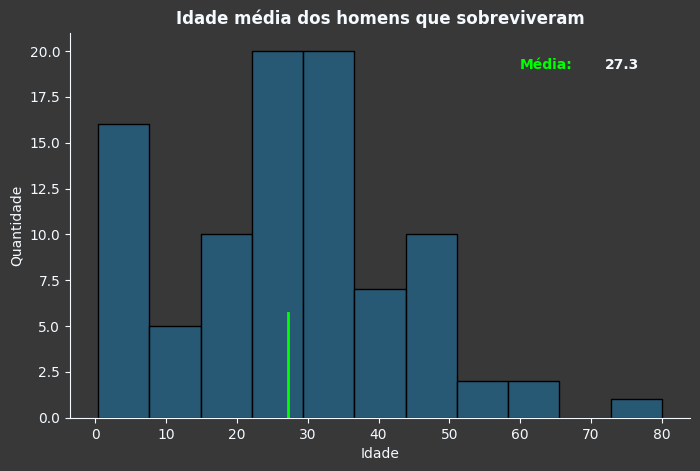

Insight: A idade média dos homens que sobreviveram está em torno de 27 a 28 anos.


In [49]:
# checking age mean of all survived
# mens
plot_hist(
    data=tit_with_sex_in_pt[(tit_with_sex_in_pt.Sobreviveu == "Sim") & (tit_with_sex_in_pt.Sexo == "Homem")],
    column="Idade",
    title="Idade média dos homens que sobreviveram",
    enable_median=False
)
_insights(message="A idade média dos homens que sobreviveram está em torno de 27 a 28 anos.", length=20)

15 - Levando-se em consideração passageiros prioritários (mulheres e crianças de até 15 anos independente do sexo) qual a proporção de sobreviventes por sexo?

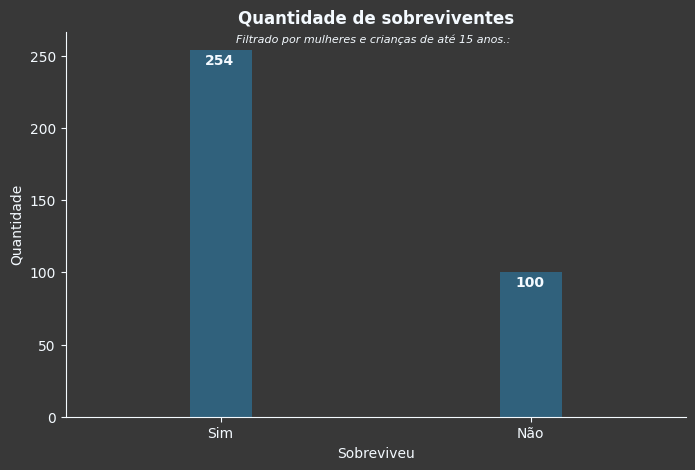

In [50]:
count_plot(
    data=tit_with_sex_in_pt[
        (tit_with_sex_in_pt.Sexo == "Mulher") |
        (tit_with_sex_in_pt.Idade <= 15)
    ],
    column="Sobreviveu",
    title="Quantidade de sobreviventes",
    _x=0.05,
    _y=10,
    subtitle="Filtrado por mulheres e crianças de até 15 anos.:"
)

16 - Qual a quantidade de passageiros por classe?

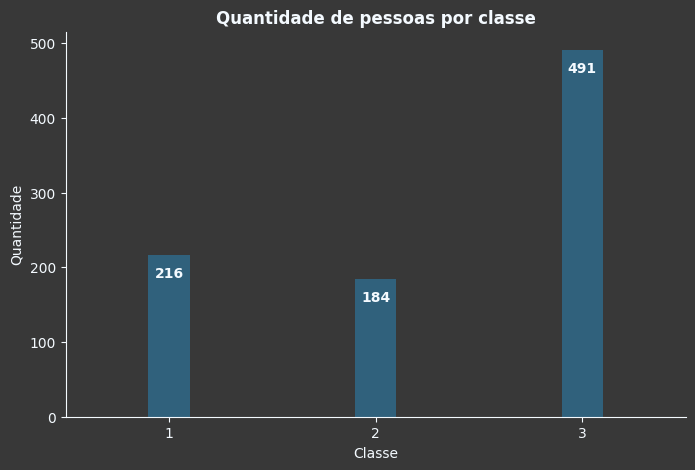

In [51]:
count_plot(
    data=tit_with_sex_in_pt,
    column="Classe",
    title="Quantidade de pessoas por classe",
    _x=0.03,
    _y=30
)

17 - Qual o percentual de sobreviventes por classe?

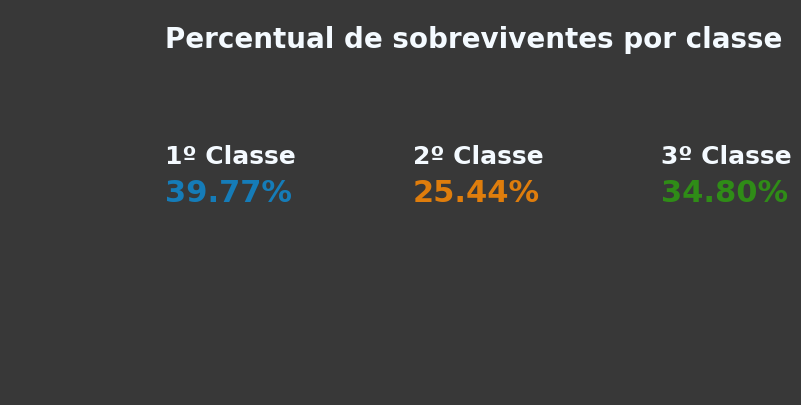

19619

In [52]:
# computing percentages
filterd_df = tit_with_sex_in_pt[tit_with_sex_in_pt.Sobreviveu == "Sim"]

class_percent = dict(map(
    lambda data: (data[0], data[1] / filterd_df.shape[0] * 100),
    filterd_df.Classe.value_counts().items()
))
class_percent = dict(sorted(class_percent.items(), key=lambda x: x[0], reverse=False))

# preparing figure
fig, ax = plt.subplots(figsize=(8,5), facecolor=FIG_COLOR)
ax.set_facecolor(color=FIG_COLOR)

ax.set_axis_off()

# main plot
ax.text(
    x=0.25,
    y=0.9,
    s="Percentual de sobreviventes por classe",
    fontdict={
        "color": TEXT_COLOR,
        "size": 20,
        "weight": "bold"
    }
)

for (pos, (class_number, percent), color) in zip((0.25, 0.65, 1.05), class_percent.items(), ("#157CB8", "#DF7D0C", "#2F8C17")):
    ax.text(x=pos, y=0.6, s=f"{class_number}º Classe", fontdict={"size": 18, "color": TEXT_COLOR, "weight": "bold"})
    ax.text(x=pos, y=0.5, s=f"{percent:.2f}%", fontdict={"size": 22, "color": color, "weight": "bold"})

plt.show()
plt.close(fig=fig)

del filterd_df, class_percent, fig, ax, class_number, percent, color, pos
gc.collect()

18 - Crie um dataframe que demonstre a quantidade de sobreviventes e não sobreviventes, agrupados por sexo e classe.

In [53]:
df_gp_by_sex_and_class = tit_with_sex_in_pt.groupby(by=["Sexo", "Classe"])
df_gp_by_sex_and_class.Sobreviveu.value_counts()

Sexo    Classe  Sobreviveu
Homem   1       Não            77
                Sim            45
        2       Não            91
                Sim            17
        3       Não           300
                Sim            47
Mulher  1       Sim            91
                Não             3
        2       Sim            70
                Não             6
        3       Não            72
                Sim            72
Name: Sobreviveu, dtype: int64

19 - Dos homens com idade entre 24 e 30 anos quantos da classe 3 sobreviveram? Quantos da classe 2 não sobreviveram?

In [54]:
for class_number, target, text in [(3, "Sim", "que sobreviveram"), (2, "Não", "que não sobreviveram")]:

    df_filtered = df_gp_by_sex_and_class.get_group(name=("Homem", class_number))
    df_filtered = df_filtered[(df_filtered.Idade >= 24) & (df_filtered.Idade <= 30)]
    print(f"Quantidade de homens entre 24 e 30 anos da classe {class_number} {text}: {df_filtered.Sobreviveu.value_counts()[target]}")

Quantidade de homens entre 24 e 30 anos da classe 3 que sobreviveram: 12
Quantidade de homens entre 24 e 30 anos da classe 2 que não sobreviveram: 24
